In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
# from numpy import np
from tensorflow.keras.utils import to_categorical


In [2]:
file_url = "https://raw.githubusercontent.com/abtinshahidi/Foundation_applied_machine_learning/master/final/train_set.txt"
data = pd.read_csv(file_url, header = None, names = ['x1','x2','target'])

In [3]:
data

,x1,x2,target
0,16.263398,13.299206,r
1,0.775408,23.986692,r
2,29.170503,-3.287474,r
3,6.739044,-28.033329,r
4,3.216100,22.013695,r
...,...,...,...
680,0.244329,19.916511,r
681,22.591032,-9.133996,r
682,-21.533493,-7.396731,r
683,5.699510,30.742204,r


In [59]:
dataaframe['x3'] = dataaframe.x1**2

In [60]:
dataaframe

,x1,x2,target,x3
0,16.263398,13.299206,r,264.498124
1,0.775408,23.986692,r,0.601257
2,29.170503,-3.287474,r,850.918251
3,6.739044,-28.033329,r,45.414707
4,3.216100,22.013695,r,10.343297
...,...,...,...,...
680,0.244329,19.916511,r,0.059697
681,22.591032,-9.133996,r,510.354718
682,-21.533493,-7.396731,r,463.691321
683,5.699510,30.742204,r,32.484417


In [7]:
dataframe = data.copy()

In [115]:
# dataframe = pd.concat([data.iloc[:,:-1],pd.get_dummies(data['target'])], axis = 1)
# dataframe

,x1,x2,b,g,r
0,16.263398,13.299206,0,0,1
1,0.775408,23.986692,0,0,1
2,29.170503,-3.287474,0,0,1
3,6.739044,-28.033329,0,0,1
4,3.216100,22.013695,0,0,1
...,...,...,...,...,...
680,0.244329,19.916511,0,0,1
681,22.591032,-9.133996,0,0,1
682,-21.533493,-7.396731,0,0,1
683,5.699510,30.742204,0,0,1


In [8]:
target_map = {
    'r' : 0,
    'g' : 1,
    'b' : 2
}

In [9]:
dataframe.target = dataframe.target.map(target_map)

In [116]:
dataframe.r = pd.Categorical(dataframe.r)
dataframe.g = pd.Categorical(dataframe.g)
dataframe.b = pd.Categorical(dataframe.b)

In [39]:
dataframe

,x1,x2,target
0,16.263398,13.299206,0
1,0.775408,23.986692,0
2,29.170503,-3.287474,0
3,6.739044,-28.033329,0
4,3.216100,22.013695,0
...,...,...,...
680,0.244329,19.916511,0
681,22.591032,-9.133996,0
682,-21.533493,-7.396731,0
683,5.699510,30.742204,0


In [40]:
counts = np.bincount(dataframe.iloc[:, -1])

weight_for_r = 1.0 / counts[0]
weight_for_g = 1.0 / counts[1]
weight_for_b = 1.0 / counts[2]

In [88]:
weight_for_b, weight_for_g, weight_for_r

(0.02, 0.02, 0.0017094017094017094)

In [10]:
dataframe.iloc[:,:1] = dataframe.iloc[:,:1].astype(float)

In [ ]:
pd.Categorical

In [49]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      685 non-null    float64
 1   x2      685 non-null    float64
 2   target  685 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 16.2 KB


In [13]:
to_categorical(dataframe.iloc[:,-1])

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(dataframe.iloc[:,:2], to_categorical(dataframe.iloc[:,-1]), test_size = 0.3)

In [15]:
tf.keras.backend.set_floatx('float64')

In [50]:
model = tf.keras.models.Sequential()

In [51]:
# model.add(tf.keras.layers.Dense(128, activation = 'relu'))
# model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(32, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(3, activation = 'softmax'))


In [52]:
metrics = [
#     keras.metrics.FalseNegatives(name="fn"),
#     keras.metrics.FalsePositives(name="fp"),
#     keras.metrics.TrueNegatives(name="tn"),
#     keras.metrics.TruePositives(name="tp"),
    keras.metrics.Precision(name="precision"),
    keras.metrics.Recall(name="recall"),
    keras.metrics.Accuracy(name='accuracy'),
    keras.metrics.CategoricalAccuracy(name="categorical_accuracy")#, dtype=None),
#     keras.metrics.

]

model.compile(
    loss='categorical_crossentropy',#binary_crossentropy;categorical_crossentropy
    optimizer='adam',
    metrics=['accuracy']#metrics
)


In [ ]:
# tf.keras.optimizers.

In [53]:
# model.fit(x = X_train,
#         y = Y_train,
#         batch_size = 32,
#         epochs = 50,
#         verbose = 2)
history = model.fit(
    X_train,
    Y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    verbose = 1,
    shuffle=True,
#     class_weight={0:weight_for_r,1:weight_for_g,2:weight_for_b}
)

Epoch 1/20
24/24 [==============================] - 0s 8ms/step - loss: 1.4499 - accuracy: 0.6736 - val_loss: 1.4826 - val_accuracy: 0.8229
Epoch 2/20
24/24 [==============================] - 0s 2ms/step - loss: 1.1379 - accuracy: 0.7598 - val_loss: 1.2004 - val_accuracy: 0.8229
Epoch 3/20
24/24 [==============================] - 0s 2ms/step - loss: 0.9570 - accuracy: 0.7572 - val_loss: 1.1647 - val_accuracy: 0.8229
Epoch 4/20
24/24 [==============================] - 0s 2ms/step - loss: 0.9170 - accuracy: 0.7885 - val_loss: 1.1287 - val_accuracy: 0.8229
Epoch 5/20
24/24 [==============================] - 0s 2ms/step - loss: 0.8922 - accuracy: 0.7833 - val_loss: 0.9032 - val_accuracy: 0.8229
Epoch 6/20
24/24 [==============================] - 0s 2ms/step - loss: 0.8571 - accuracy: 0.7807 - val_loss: 0.8776 - val_accuracy: 0.8229
Epoch 7/20
24/24 [==============================] - 0s 3ms/step - loss: 0.8592 - accuracy: 0.7859 - val_loss: 0.7933 - val_accuracy: 0.8229
Epoch 8/20
24/24 [==

In [54]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                192       
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_9 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 3)                 99        
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


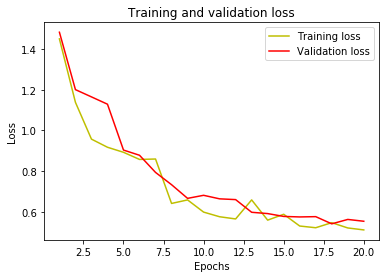

In [55]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

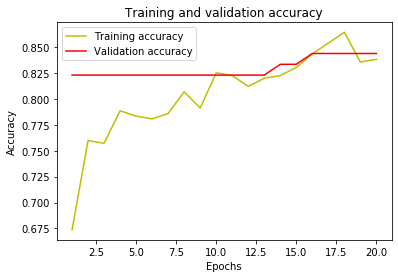

In [58]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [57]:
history.history

{'loss': [1.449915679565609,
  1.1379430183542616,
  0.9569629873526003,
  0.9170128710898656,
  0.8921728753545577,
  0.8571074871108053,
  0.859163685349198,
  0.6406527956845555,
  0.6580465713773633,
  0.5980774777365104,
  0.5752071522701503,
  0.5644272873980569,
  0.6580583314671529,
  0.5585619043121138,
  0.5874518740426156,
  0.5295967913327578,
  0.5211564372476025,
  0.5460668830273979,
  0.5200929920293643,
  0.5104504350582552],
 'accuracy': [0.6736292428198434,
  0.7597911227154047,
  0.7571801566579635,
  0.7885117493472585,
  0.783289817232376,
  0.7806788511749347,
  0.7859007832898173,
  0.8067885117493473,
  0.7911227154046997,
  0.825065274151436,
  0.8224543080939948,
  0.8120104438642297,
  0.8198433420365535,
  0.8224543080939948,
  0.8302872062663186,
  0.8433420365535248,
  0.8537859007832899,
  0.8642297650130548,
  0.835509138381201,
  0.8381201044386423],
 'val_loss': [1.4826479852199554,
  1.2004130085309346,
  1.1647220651308696,
  1.12872776389122,
  0.9

In [80]:
x = pd.concat([pd.DataFrame(model.predict(X_test), columns=['ypred']),Y_test.reset_index(drop = True)], axis=1)

In [82]:
x.ypred.value_counts()

1.0    206
Name: ypred, dtype: int64

In [ ]:
counts = np.bincount(train_targets[:, 0])

weight_for_r = 1.0 / counts[0]
weight_for_g = 1.0 / counts[1]
weight_for_b = 1.0 / counts[1]